In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/Data/Twitter_review/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [4]:
df.head(5)

,0,1,2,3,4,5
0,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df=df.drop(axis=0,index=0)
df.head(5)

,0,1,2,3,4,5
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df=df.reset_index()
df.head(5)

,index,0,1,2,3,4,5
0,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
df=df.drop(['index'],axis=1)

In [8]:
df.head(5)

,0,1,2,3,4,5
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.columns=['sentiment','id','date','query','username','text']
df.head(5)

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
username     0
text         0
dtype: int64

In [11]:
df['sentiment'].value_counts()

0    668925
4    248576
0    131071
Name: sentiment, dtype: int64

In [12]:
df['sentiment'].unique()

array(['0', 0, 4], dtype=object)

In [13]:
dict={"0":0,0:0,4:4}
def label_encdoer(label):
  return dict[label]

df['sentiment']=df['sentiment'].apply(lambda x: label_encdoer(x))
df['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='Count'>

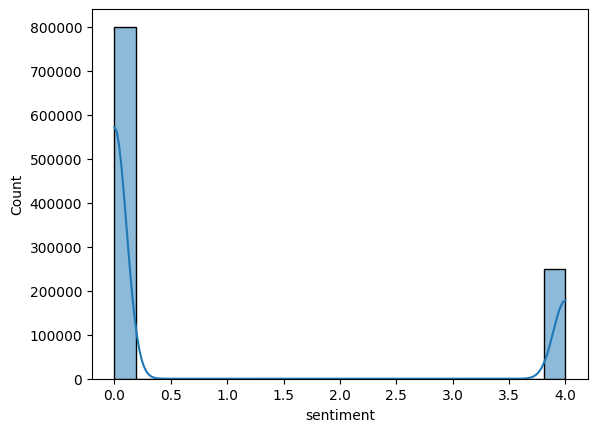

In [15]:
sns.histplot(df['sentiment'],kde=True)

<Axes: >

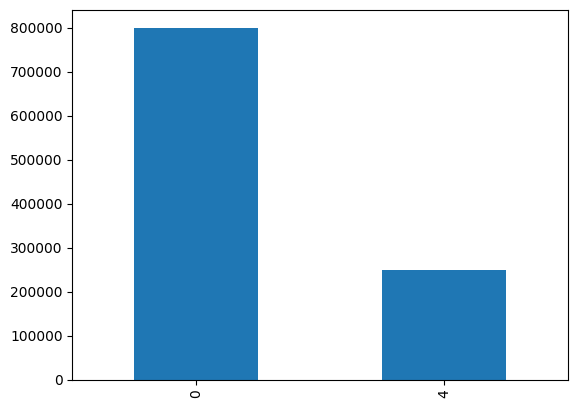

In [16]:
df['sentiment'].value_counts().plot(kind='bar')

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stuff_to_be_removed=list(stopwords.words('english')+list(punctuation))
stemmer=LancasterStemmer()
corpus=df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [19]:
import re

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
final_corpus=[]
final_corpus_join=[]
for i in df.index:
  text=re.sub('[^a-zA-Z]',' ',df['text'][i])
  text=text.lower()
  text=re.sub('&lt;/?.*?&gt;','&lt;&gt;',text)
  text=re.sub('(\\d|\\W)+',' ',text)
  text=text.split()
  lem=WordNetLemmatizer()
  text=[lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
  text1=' '.join(text)
  final_corpus.append(text)
  final_corpus_join.append(text1)

In [24]:
df_cleaned=pd.DataFrame()
df_cleaned['text']=final_corpus_join
df_cleaned['sentiment']=df['sentiment'].values

In [25]:
df_eda=pd.DataFrame()
df_eda['text']=final_corpus
df_eda['sentiment']=df['sentiment'].values

In [26]:
df_cleaned.head(5)

,text,sentiment
0,upset update facebook texting might cry result...,0
1,kenichan dived many time ball managed save res...,0
2,whole body feel itchy like fire,0
3,nationwideclass behaving mad see,0
4,kwesidei whole crew,0


In [30]:
positive=df_eda[df_eda['sentiment']==4]
positive_list=positive['text'].tolist()
negitive=df_eda[df_eda['sentiment']==0]
negitive_list=negitive['text'].tolist()

In [31]:
positive_all=' '.join([word for sent in positive_list for word in sent])
negitive_all=' '.join([word for sent in negitive_list for word in sent])

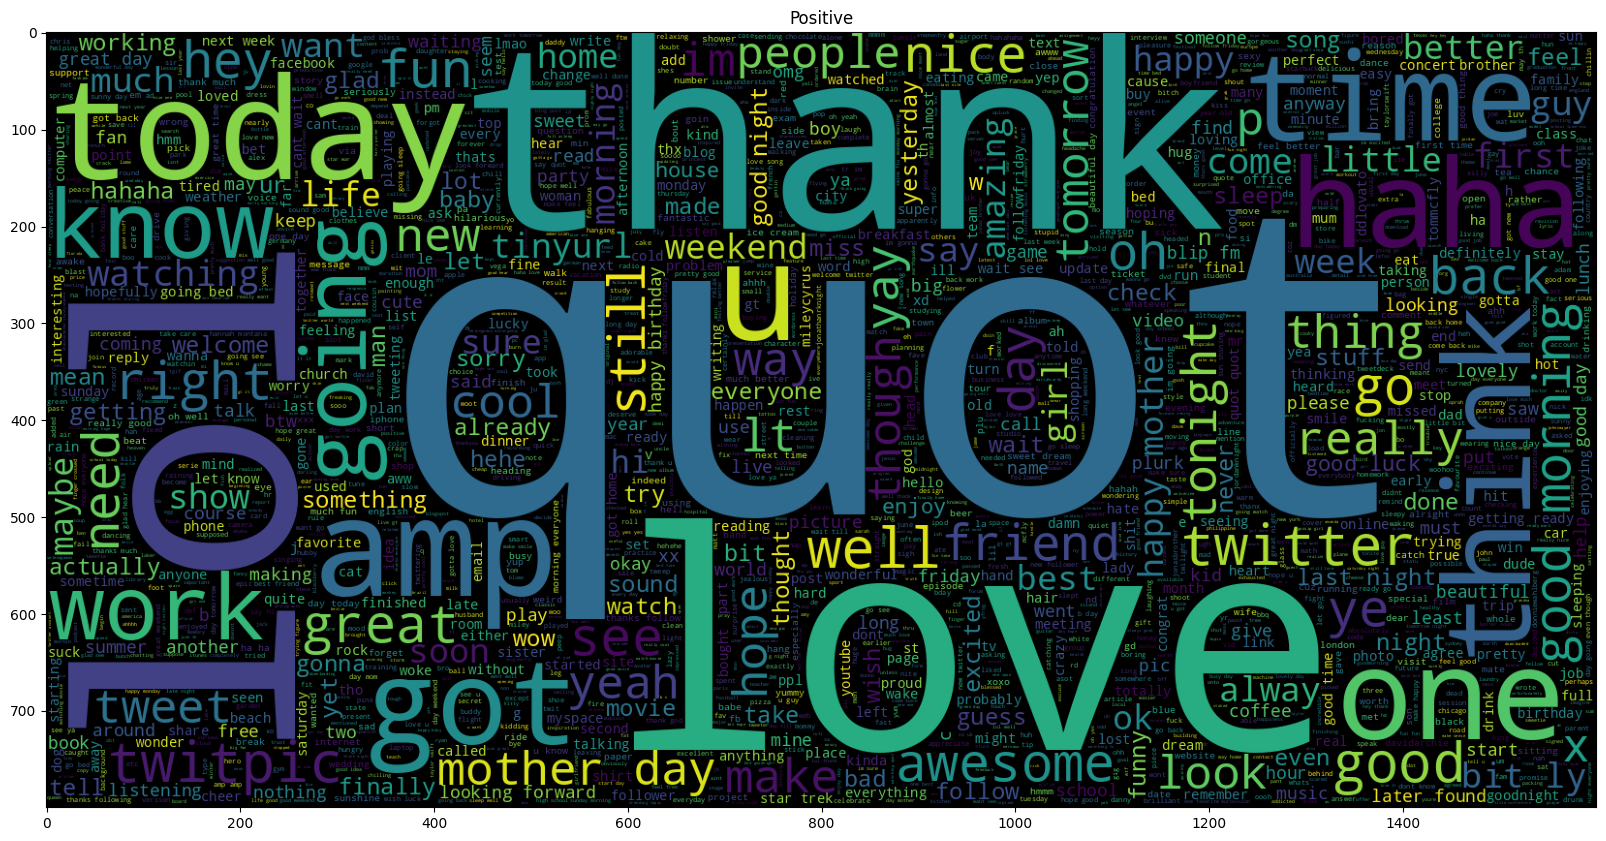

In [32]:
from wordcloud import WordCloud
WordCloud()
wc=WordCloud(max_words=2000,width=1600,height=800).generate(positive_all)

plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.title('Positive')
plt.show()

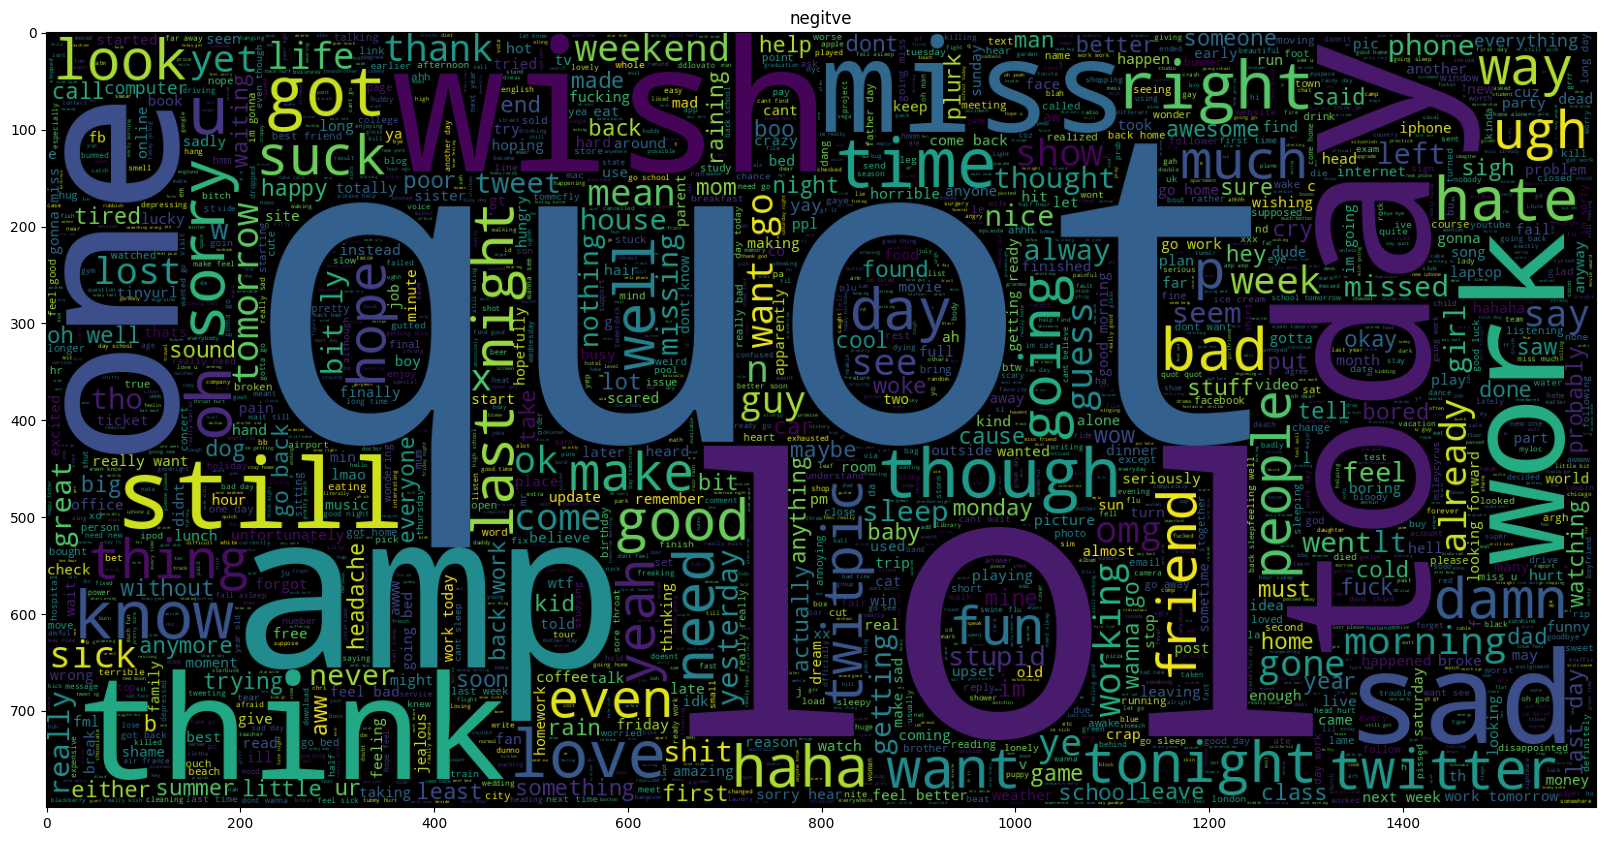

In [33]:
wc=WordCloud(max_words=2000,width=1600,height=800).generate(negitive_all)

plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.title('negitve')
plt.show()

In [34]:
lab_encode={0:'negitive',4:'positive'}
def encode(label):
  return lab_encode[label]

df_cleaned['sentiment']=df_cleaned['sentiment'].apply(lambda x: encode(x))

In [35]:
df_cleaned.head(5)

,text,sentiment
0,upset update facebook texting might cry result...,negitive
1,kenichan dived many time ball managed save res...,negitive
2,whole body feel itchy like fire,negitive
3,nationwideclass behaving mad see,negitive
4,kwesidei whole crew,negitive


In [36]:
TRAIN_SIZE=0.8
MAX_NB_WORDS=100000
MAX_SEQUENCE_LENGTH=30

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_data,test_data=train_test_split(df_cleaned,test_size=(1-TRAIN_SIZE),random_state=10)

print(len(train_data))
print(len(test_data))

838857
209715


In [39]:
train_data.head(10)

,text,sentiment
144586,going school today rough week,negitive
655314,yay nother interview monday im lil worried one...,negitive
865632,fun day got home seeing new wolverine movie bo...,positive
288663,cyhuntastic wish could gone,negitive
185331,min till lenoleaves,negitive
178600,damn plan canceled another friday night home,negitive
51956,dizzybunny oh plymouth long way lol hope peopl...,negitive
34049,really want sour apple raspberry slurpee cold ...,negitive
379759,phone died,negitive
727567,shleep thinking much fb,negitive


In [40]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index=tokenizer.word_index
vocab_size=len(tokenizer.word_index)+1
print('vocabular size',vocab_size)

vocabular size 354911


In [45]:
pip install sequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for sequence: filename=sequence-0.3.4-py3-none-any.whl size=5415 sha256=55ed608f80ad2d597f109f2aab28ae5effb1eb3d84e906f6e6f75d2542f4aad4
  Stored in directory: /root/.cache/pip/wheels/4c/bd/44/af4ff25940a673c359d905591bad7468270108e1d2255bd720
  Created wheel for daytime: filename=daytime-0.4-py3-none-any.whl size=2419 sha256=ff8ac8268dd2f95bb520d1b0e285d92e70475d486ed0b850642d2fc59b89bcc6
  Stored in directory: /root/.cache/pip/wheels/cd/40/c7/fc109bc6716d31e4d5fdc0cd72891253fa46032e71d9aa1b93
Successfully built sequence daytime


In [43]:
pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10212 sha256=16a5ea02a56592ade917f2685ffbd818017fc3d23113507d19f7ccf30efba494
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [49]:
from keras.utils import pad_sequences

x_train=pad_sequences(tokenizer.texts_to_sequences(train_data.text),maxlen=MAX_SEQUENCE_LENGTH)

x_test=pad_sequences(tokenizer.texts_to_sequences(test_data.text),maxlen=MAX_SEQUENCE_LENGTH)

print('shape of train',x_train.shape)
print('shape of test',x_test.shape)

shape of train (838857, 30)
shape of test (209715, 30)


In [50]:
labels=train_data.sentiment.unique().tolist()

In [51]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder=LabelEncoder()

encoder.fit(train_data.sentiment.tolist())

y_train=encoder.transform(train_data.sentiment.tolist())

y_test=encoder.transform(test_data.sentiment.tolist())

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of y_train (838857, 1)
shape of y_test (209715, 1)


In [54]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-05-05 19:08:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-05 19:08:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-05 19:08:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [55]:
GLOVE_EMB='/content/glove.6B.300d.txt'
EMBEDDING_DIM=300
LR=1e-3
BATCH_SIZE=1024
EPOCHS=10


In [60]:
embeddings_index={}
f=open(GLOVE_EMB)
for line in f:
  values=line.split()
  word=value=values[0]
  coef=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coef
f.close()

print('found %s word vectors' %len(embeddings_index))

found 400000 word vectors


In [62]:
embedding_matrix=np.zeros((vocab_size,EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector=embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [64]:
import tensorflow as tf

In [65]:
embedding_layer=tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [66]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout

from tensorflow.keras.layers import SpatialDropout1D

from tensorflow.keras.callbacks import ModelCheckpoint

In [69]:
sequence_input=Input(shape=(MAX_SEQUENCE_LENGTH),dtype='int32')
embedding_sequences=embedding_layer(sequence_input)
x=SpatialDropout1D(0.2)(embedding_sequences)
x=Conv1D(64,5,activation='relu')(x)
x=Bidirectional(LSTM(64,dropout=0.2,recurrent_dropout=0.2))(x)
x=Dense(512,activation='relu')(x)
x=Dropout(.5)(x)
x=Dense(512,activation='relu')(x)
outputs=Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(sequence_input,outputs)

In [70]:
from math import factorial
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR),loss='binary_crossentropy',metrics=['accuracy'])

ReduceLROnPlateau=ReduceLROnPlateau(factorial=0.1,
                                    min_lr=0.01,
                                    monitor='val_loss',
                                    verbose=1)

In [71]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [72]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
820/820 [==============================] - 273s 309ms/step - loss: 0.4277 - accuracy: 0.8073 - val_loss: 0.3985 - val_accuracy: 0.8209 - lr: 0.0010
Epoch 2/10
820/820 [==============================] - 252s 307ms/step - loss: 0.3988 - accuracy: 0.8214 - val_loss: 0.3895 - val_accuracy: 0.8267 - lr: 0.0010
Epoch 3/10
820/820 [==============================] - 245s 299ms/step - loss: 0.3894 - accuracy: 0.8262 - val_loss: 0.3884 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 4/10
820/820 [==============================] - 246s 300ms/step - loss: 0.3831 - accuracy: 0.8297 - val_loss: 0.3829 - val_accuracy: 0.8288 - lr: 0.0010
Epoch 5/10
820/820 [==============================] - 246s 299ms/step - loss: 0.3785 - accuracy: 0.8318 - val_loss: 0.3802 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 6/10
820/820 [==============================] - 245s 299ms/step - loss: 0.3748 - accuracy: 0.8334 - val_loss: 0.3794 - val_accuracy: 0.8304 - lr: 0.0010
Epoch 7/10
820/820 [==========================

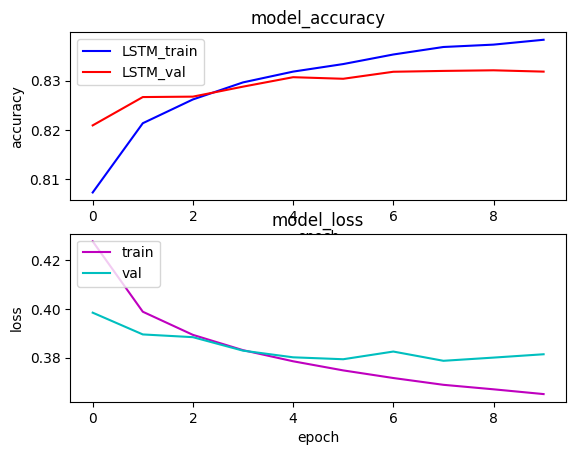

In [73]:
s,(at,al)=plt.subplots(2,1)
at.plot(history.history['accuracy'],c='b')
at.plot(history.history['val_accuracy'],c='r')
at.set_title('model_accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train','LSTM_val'],loc='upper left')

al.plot(history.history['loss'],c='m')
al.plot(history.history['val_loss'],c='c')
al.set_title('model_loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train','val'],loc='upper left')

In [74]:
def decode_sentiment(score):
  return 'positive' if score>0.5 else 'negitive'

scores=model.predict(x_test,verbose=1,batch_size=10000) 
y_pred_1d=[decode_sentiment(score) for score in scores]

21/21 [==============================] - 3s 84ms/step


In [75]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, fontsize=20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, fontsize=13)
  plt.yticks(tick_marks, classes, fontsize=13)

  fmt = '.2f'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label', fontsize=17)
  plt.xlabel('Predicted label', fontsize=17)

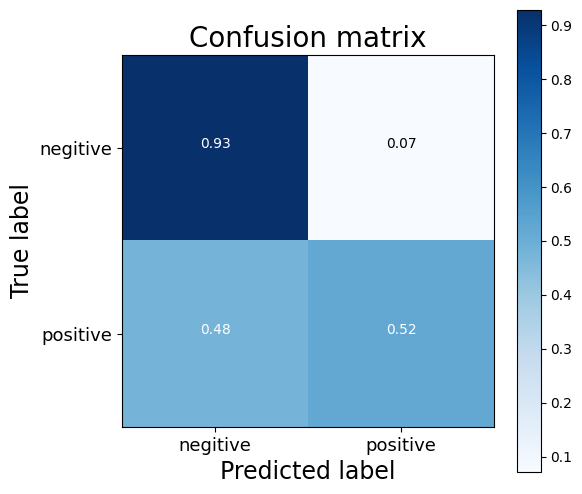

In [76]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()


In [77]:
print(classification_report(list(test_data.sentiment), y_pred_1d))


              precision    recall  f1-score   support

    negitive       0.86      0.93      0.89    159942
    positive       0.69      0.52      0.60     49773

    accuracy                           0.83    209715
   macro avg       0.78      0.73      0.74    209715
weighted avg       0.82      0.83      0.82    209715

